In [3]:
#!pip install --user graphviz 
#!apt-get install graphviz

  Using cached https://files.pythonhosted.org/packages/1f/e2/ef2581b5b86625657afd32030f90cf2717456c1d2b711ba074bf007c0f1a/graphviz-0.10.1-py2.py3-none-any.whl


# Drzewa klasyfikacyjne (metoda rekurencyjnego podziału)

Metoda ta polega na sekwencyjnym (rekurencyjnym) podziale przestrzeni danych na podprzestrzenie (hiperkostki, segmenty), aż zmienna zależna osiągnie w każdej podprzestrzeni minimalny poziom zróżnicowania.

# Classification trees 

This method is based on the sequential (recursive) division of data space into subspaces (subsets) until the subset  has all the same values of the target variable


## Wady i zalety drzewa decyzyjnego
**Zalety:**

1. *niezparametryczność* – przy budowaniu modelu nie zakłada się postaci rozkładów zmiennych ani relacji między nimi
2. *adaptacyjność* – automatyczny proces doboru zmiennych do modelu, możliwość uwzględnieniem zarówno zmiennych jakościowych i ilościowych,
3. *odporność na braki danych oraz występowanie wartości
nietypowych* 
4. *łatwa interpretowalność* -  możliwość graficznego przedstawienia modelu w postaci drzewa, możliwość zapisania reguł klasyfikujących

**Główna wada:**

1. *niestabilność modelu* -  oznacza, że postać modelu silnie zależy od dostępnego zbioru uczącego, budowanie drzew na różnych podzbiorach trenujących daje bardzo różniące się modele

## Advantages and disadvantages of a decision tree
**Advantages:**

1. *nonparametric* - no variable distributions or relationships between them are assumed  diuring building the model,
2. *adaptability* - automatic process of selecting variables for the model, both qualitative and quantitative variables ca be taken into account,
3. *resistance to missing values ​​ and occurrence of atypical values*
4. *interpretable* - the model can be presented graphically as a tree and the classification rules can be saved

**The main disadvantage:**

1. *model instability* - means that the form of the model strongly depends on the available training set, building trees on different training subsets gives different models

## Algorytm tworzenia drzewa klasyfikującego

**Kroki algorytmu**

1. Mając treningory zbiór obiektów $S$, sprawdź, czy należą one do tej samej klasy. Jeżli
tak, to zakończ pracę.
2. W przeciwnym przypadku rozważ wszystkie możliwe podziały zbioru S na
podzbiory $S_1$, $S_2$, ..., $S_m$ tak, aby były one jak najbardziej jednorodne.
3. Dokonaj oceny jakości każdego z tych podziałów zgodnie z przyjętym kryterium
i wybierz najlepszy z nich.
4. Podziel zbiór $S$ w wybrany sposób.
5. Wykonaj kroki 1-4 rekurencyjnie dla każdego z podzbiorów

W domyślnej wersji algorytmu każdorazowo poszukiwany jest najlepszy podział pod względem zmiennej jak i sposobu podziału przestrzeni względem niej. To domyślne działanie można jednak zmienić, o czym powiemy za chwilę. 


## Kryterium podziału 
Domyślnie kryterium podziału jest minimalizacja zróżnicowania (heterogeniczności) elementów w każdym z podziałów. W powyższym przykładzie wykorzystywany jest wskaźnik Giniego.


W pierwszej kolejności dla każdej z $K$ klas ($k \in K$) dla każdego z $M$ podobszarów ($m \in M$) wyznaczana jest średnia ilość elementów danej klasy w tym obszarze:

$$p_{km} = \frac{1}{N_s}\sum_{x_i \in S_m}I(y_i=k)$$

$N_s$ to ilość elementów w danym obszarze.

Współczynnik Giniego definiujemy jako:
$$H(m) = \sum_k p_{km}(1-p_{km})$$

Gdy w danym obszerze występują tylko reprezentanci jednej klasy $p_{km}=1$ dla tej wybranej klasy. Dla pozostałych klas współczynnik ten wynosi 0. Wówczas $H=0$ dla takiego obszaru.


## Algorithm for creating a classification tree

**Steps of the algorithm**

1. Check if the objects in the training set $S$ belong to the same class. If yes, finish your work.
2. Otherwise, consider all possible divisions of the set $S$ into
subsets $S_1$, $S_2$, ..., $S_m$ so that they are as homogeneous as possible.
3. Assess the quality of each division in accordance with the adopted criterion
and choose the best one.
4. Split the $S$ set in the chosen way.
5. Perform steps 1-4 recursively for each subset.

In the default version of the algorithm, the best division is always sought in terms of the variable and how the space is divided with respect to it. However, this default behavior can be changed, which we'll talk about in a moment.


## Split point selection 
By default, the split should minimize the diversity (heterogeneity) of the elements in all subset. In the above example, the Gini index is used to measure heterogeneity.


First, in all subareas $m \in M$ the average number of elements of given class $k \in K$ is determined:

$$p_{km} = \frac{1}{N_s}\sum_{x_i \in S_m}I(y_i=k)$$

$N_s$ is the number of all elements in a given area.

We define the Gini coefficient as:
$$H(m) = \sum_k p_{km}(1-p_{km})$$

When in a given subarea $m$ there are only representatives of one class $k$ $p_{km}=1$. For other classes this coefficient is equal to 0. Then  Gini coefficient $H(m)=0$.

### Klasyfikacja z wykorzystaniem metody rekurencyjnego podziału dla danych $iris$

### Tree classification of the $iris$ data

W pierwszym kroku importujemy przydatne biblioteki. Drzewa klasyfikacyjne zostały zaimplementowane w bibliotece $sklearn$.

Classification trees have been implemented in the $sklearn$ library, so in the first step, we import necessary functions from this library. 

In [1]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
#from sklearn import tree
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.model_selection import train_test_split

Bodatkowo biblioteka $graphviz$ będzie przydatna do wizualizacji otrzymanych drzew.

In addition, the $graphviz$ library will be useful for visualizing the received trees.

In [2]:
import graphviz 
import numpy as np
import matplotlib.pyplot as plt


#### Zestaw danych IRIS

#### IRIS data set

Informacje o kwiatech o polskiej nazwie **kosaciec**  dostępne w zestawie *Iris* zostały zebrane przez  biologa Ronalda Fishera w roku 1936. Wykorzystał on je w pracy  *The use of multiple measurements in taxonomic problems*.

#### Iris Setosa
![alt text](https://i.ebayimg.com/images/g/xEgAAOSwoBtW6BoO/s-l1600.jpg)
#### Iris Virginica
![alt text](https://upload.wikimedia.org/wikipedia/commons/thumb/f/f8/Iris_virginica_2.jpg/1280px-Iris_virginica_2.jpg)
#### Iris Versicolor
![alt text](http://latour-marliac.com/323-large_default/iris-versicolor-iris-versicolore.jpg)


Dla reprezentantów poszczególnych  gatunków mierzono długość i szerokość płatka „petal” i działki kielicha kwiatu „sepal”.

Information on iris flowers available in the set *Iris* was collected by biologist Ronald Fisher in 1936. He used it in his work *The use of multiple measurements in taxonomic problems*.

####  Setosa Iris
![alt text](https://i.ebayimg.com/images/g/xEgAAOSwoBtW6BoO/s-l1600.jpg)
####  Virginica Iris
![alt text](https://upload.wikimedia.org/wikipedia/commons/thumb/f/f8/Iris_virginica_2.jpg/1280px-Iris_virginica_2.jpg)
####  Versicolor Iris
![alt text](http://latour-marliac.com/323-large_default/iris-versicolor-iris-versicolore.jpg)


For representatives of  particular species, the length and width of the petal and the sepal flower cup were measured.

**Krok 1:** Podziel dane na dane treningowe i testowe w proporcji 0.77 do 0.33. Ustaw `random_state` na 1.

**Step 1:** Divide the data into training and test data in the ratio 0.77 to 0.33. Set `random_state` to 1.

In [3]:
iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)


In [4]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

**Krok 2:** Trening klasyfikatora  `DecisionTreeClassifier` z biblioteki `sklearn`

**Step 2:** Training of the `DecisionTreeClassifier` classifier

In [10]:
%%time

clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 1.6 ms


**Krok 2.1:** Podgląd otrzymanego drzewa decyzyjnego

**Step 2.1:** Preview of the received decision tree

*wersja czarno-biała* 

*black and white version*

In [6]:
dot_data = export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 

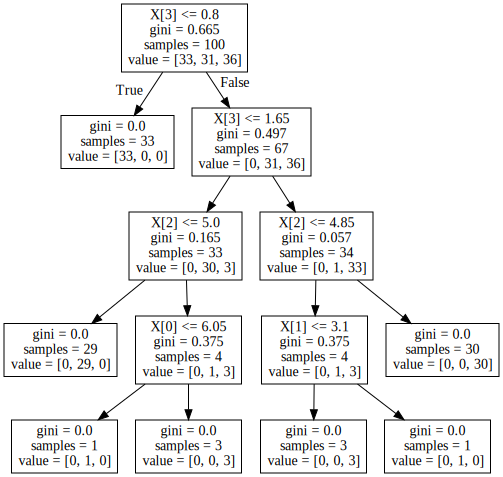

In [7]:
graph

*wersja kolorowa* 

*color version*

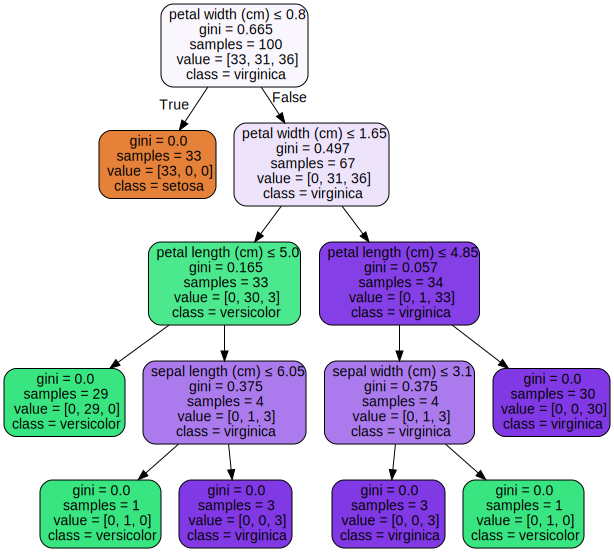

In [11]:
dot_data = export_graphviz(clf, out_file=None, 
                         feature_names=iris.feature_names,  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

**Zadanie**

Do jakiej klasy został przypożądkowany irys z zestawu testowego X_test[10]. Podaj nazwę.

**Exercise**

To which class belong the iris X_test[10] from the test set. Give the name.

In [16]:
iris.target_names[clf.predict([X_test[10]])[0]]

'versicolor'

## Dokładność modelu

Metodą $score$ wyznacz dokładność otrzymanego modelu

## Model accuracy

Using the $score$ method determine the accuracy of the obtained model

In [17]:
clf.score(X_test, y_test)

0.96

## Podgląd otrzymanych podziałów

Aby można było zwizualizować otrzymane podziały konieczna jest redukcja przestrzeni cech do dwóch wymirów. Oznacza to, że podczas klasyfikacji uwzględniamy tylko 2 zmienne objaśniające.


## Preview of received divisions

In order to visualize the obtained divisions, it is necessary to reduce the feature space to two dimensions. This means that we only include 2 explanatory variables during the classification.


In [2]:
# Parameters
n_classes = 3
plot_step = 0.02


plt.set_cmap(plt.cm.jet)


for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
  
    # We train classifier only on 2 features
    X = iris.data[:, pair]
    y = iris.target

    clf_tmp = DecisionTreeClassifier().fit(X, y)

    # Plot
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = clf_tmp.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.imshow(Z,extent=[x_min,x_max,y_min,y_max],origin='lower',alpha=0.6)
    plt.scatter(X[:,0], X[:,1],c=np.ravel(y),edgecolors='black')

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])
    plt.axis("tight")


    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
    plt.grid(False)

plt.show()


NameError: name 'plt' is not defined

## Inne opcje poszukiwania najlepszego podziału

Kiedy mamy zbyt dużo danych lub zmiennych objaśniających czas poszukiwania optymalnego podziału rośnie. Aby w każdym kroku nie przeszukiwać wszystkich możliwych podziałów mamy dwie możliwości. Możliwe ustawienia:

### `max_features`

Ilość zmiennych uwzględnianych w czasie poszukiwania optymalnego podziału. Możliwe opcje:
*  liczba całkowita - uwzględnia dokładnie tyle ziennych podczas każdego podziału
*  liczba zmiennoprzecinkowa - tyle procent zmiennych będzie uwzględnianych
*  “auto” -  wówczas `max_features=sqrt(n_features)`.
*  “sqrt” - wówczas `max_features=sqrt(n_features)`
*  “log2” - wówczas `max_features=log2(n_features)`.
*  `None` - wówczas `max_features=n_features`.


## Other split point search options

When we have too much data or explanatory variables, the time to search for the optimal division increases. To avoid searching all possible divisions at every step, we have two options. Possible settings:

### `max _features`

The number of variables taken into account when searching for the optimal division. Possible options:
* integer - includes exactly the number of variables during each division
* floating point number - this is the percentage of variables that will be included
* "Auto" - then `max_ features = sqrt (n _features)`.
* "Sqrt" - then `max_ features = sqrt (n _features)`
* "Log2" - then `max_ features = log2 (n _features)`.
* `None` - then` max_ features = n_features`.

In [62]:
clf_all = DecisionTreeClassifier()
clf_all = clf_all.fit(X_train, y_train)

print(clf_all.score(X_test, y_test), clf_all.score(X_train, y_train))


clf = DecisionTreeClassifier(max_features=1, random_state=123)
clf = clf.fit(X_train, y_train)

print(clf.score(X_test, y_test), clf.score(X_train, y_train))

0.96 1.0
0.88 1.0


### `splitter='random'`:

W tym przypadku wybór zmiennej względem której dokonywany jest podział będzie losowy.

### `splitter = 'random'`:

In this case, the selection of the variable in relation to which the division is made will be random.

In [64]:
%%time

clf = DecisionTreeClassifier(splitter='random', random_state=123)
clf = clf.fit(X_train, y_train)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 1.29 ms


In [65]:
clf.score(X_test, y_test), clf.score(X_train, y_train)

(0.94, 1.0)

### Powównanie 2 podziałów dla różnej inicjalizacji generatora liczb pseudolosowych

### Comparison of the 2 divisions for different initialization of the random number generator

No handles with labels found to put in legend.


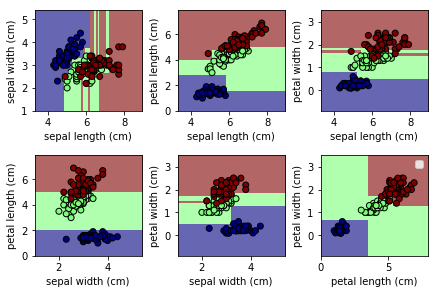

In [67]:

# Parameters
n_classes = 3
plot_step = 0.02

plt.set_cmap(plt.cm.jet)


for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    X = iris.data[:, pair]
    y = iris.target


    clf_tmp = DecisionTreeClassifier(splitter='random', random_state=2).fit(X, y)

    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = clf_tmp.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.imshow(Z,extent=[x_min,x_max,y_min,y_max],origin='lower',alpha=0.6)
    plt.scatter(X[:,0], X[:,1],c=np.ravel(y),edgecolors='black')

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])
    plt.axis("tight")

    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
    plt.grid(False)


plt.legend()
plt.show()


No handles with labels found to put in legend.


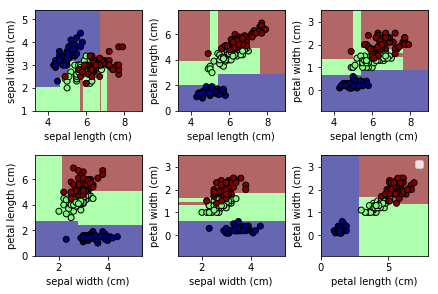

In [68]:

# Parameters
n_classes = 3
plot_step = 0.02

plt.set_cmap(plt.cm.jet)


for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    X = iris.data[:, pair]
    y = iris.target


    clf_tmp = DecisionTreeClassifier(splitter='random', random_state=100).fit(X, y)

    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = clf_tmp.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.imshow(Z,extent=[x_min,x_max,y_min,y_max],origin='lower',alpha=0.6)
    plt.scatter(X[:,0], X[:,1],c=np.ravel(y),edgecolors='black')

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])
    plt.axis("tight")

    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
    plt.grid(False)


plt.legend()
plt.show()


## Przeciwdziałanie przeuczeniu

Wymuszanie jednorodności w otrzymanych podprzestrzeniach prowadzi na ogół do zbudowaniabardzo złożonego modelu, który jest nadmiernie dopasowany dodanych ze zbioru uczącego. Pojawia się wówczas efekt przeuczenia.

Następujące parametry pozwalają zmniejszyć efekt *overfittingu*. Po znaku równości zostały podane ich domyślne wartości.

*   `max_depth=None`
*   `min_samples_split=2`
*   `min_samples_leaf=1`
*  `min_impurity_decrease=0`



## Preventing overfitting

Forcing homogeneity in the obtained subspaces usually leads to the construction of a very complex model, which is overfitted to the learning set. 

The following parameters reduce the effect of the *overfitting*. After the equal sign their default values are given.

* `max_depth = None`
* `min _samples_ split = 2`
* `min_samples_leaf = 1`
* `min _impurity_ decrease = 0`

In [69]:
%%time

clf = DecisionTreeClassifier(min_samples_split=10)
clf = clf.fit(X_train, y_train)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 1.41 ms


In [73]:
dot_data = export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 

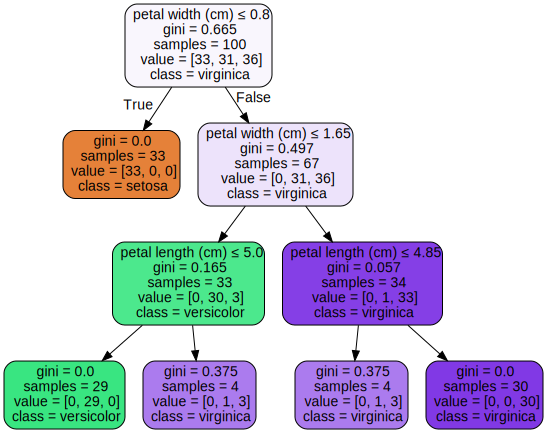

In [74]:
dot_data = export_graphviz(clf, out_file=None, 
                         feature_names=iris.feature_names,  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

In [75]:
clf.score(X_test, y_test), clf.score(X_train, y_train)

(0.96, 0.98)

## Poszukiwanie optymalnych parametrów metodą walidacji krzyżowej

**Zapamiętaj:** danych testowych możesz użyć tylko raz do sprawdzenia dokładności ostatecznego modelu. 

Aby dopasować parametry drzewa klasyfikacyjnego można wykorzystać oddzielny zbiór walidacyjny lub **metodę walidacji krzyżowej**. W tym prykładzie użyjemy tej drugiej metody.

Metoda ta pozwala określić dokładność modelu w sposób nieobciążony. 
Algorytm metody sprawdzania krzyżowego:

1. Wybierz wartość parametru $b$ (zazwyczaj $b\leq 10$) i podziel losowo zbiór uczący $U$ na $b$ równolicznych (w przybliżeniu) i rozłącznych części $U_1$, $U_2$, . . . , $U_b$.

2.  Dla $h \in {1, . . . , b}$ wykonaj kroki:

  a. zbuduj model na zbiorze $U|U_h$ (wyłączając jedną część),

  b.  oszacuj błąd klasyfikacji modelu na zbiorze $U_h$ (wykorzystując $U_h$ jako zbiór walidacyjny).

3. Wyznacz ocenę błędu klasyfikacji modelu uśredniając wartości otrzymane w kroku 2. Otrzymany wynik jest nieobciążonym estymatorem błędu klasyfikacji

Biiblioteka `sklearn` dostarcza metodę `GridSearchCV` do przeszukiwania przestrzeni hiperparametrów modelu z wykorzystaniem walidacji krzyżowej.


## Searching for optimal parameters by cross-validation

**Remember:** test data can only be used once to check the accuracy of the final model.

To adjust the classification tree parameters, you can use a separate validation data set or **cross-validation method**. In this projection we will use the second method.

Cross-validation method allows you to determine the accuracy of the model in an unbiased way.
Algorithm of the cross-validation method:

1. Select the value of the $b$ parameter (usually $b\leq 10$) and randomly divide the training set $U$ into $b$ equal (approximately) and disjoint parts  $U_1$, $U_2$,. . . , $U_b$.

2. For $h \in {1, . . . , b}$, follow these steps:

  a. build a model on the $U|U_h$ set (excluding one part),

  b. estimate the model classification error on the $U_h$ set (using $U_h$ as the validation set).

3. Calculate the classification error of the model by averaging the values obtained in step 2. The obtained result is an unbiased estimator of the classification error.

The `sklearn` library provides the` GridSearchCV` method for searching the hyperparameter space of a model using cross-validation.

In [0]:
from sklearn.model_selection import GridSearchCV

parameter_grid = {'max_depth': np.arange(3, 7),
                  'max_features': np.arange(1, 5)}

clf_grid = GridSearchCV(DecisionTreeClassifier(), parameter_grid)

clf_grid.fit(X_train, y_train)

print ("Najlepsza dokładność {}".format(clf_grid.best_score_))
print ("Dobrane parametry: {}".format(clf_grid.best_params_))




Najlepsza dokładność 0.94
Dobrane parametry: {'max_depth': 3, 'max_features': 4}


Teraz możemy przetestować otrzymany model na danych testowych

Now we can test the received model on test data set

In [0]:
clf_grid.best_estimator_.score(X_test, y_test)

0.96

# Istotność zmiennych objaśniających

Zaletą drzewa klasyfikacyjnego jest możliwość określenia istotności poszczególnych zmiennych

# Significance of explanatory variables

The advantage of a classification tree is the ability to determine the significance of individual variables

In [0]:
ids = np.argsort(clf_grid.best_estimator_.feature_importances_)

for i in ids[::-1]:
    print (iris.feature_names[i], clf_grid.best_estimator_.feature_importances_[i])

petal width (cm) 0.9308196108729353
petal length (cm) 0.06918038912706467
sepal width (cm) 0.0
sepal length (cm) 0.0


Dla poprzedniego modelu

For the previous model

In [0]:
ids = np.argsort(clf.feature_importances_)


for i in ids[::-1]:
    print (iris.feature_names[i], clf.feature_importances_[i])

petal length (cm) 0.592104014625634
petal width (cm) 0.407895985374366
sepal width (cm) 0.0
sepal length (cm) 0.0


# Zadanie

Zbuduj drzewo klasyfikacyjne dla danych dotyczących złośliwości raka piersi. Znajdź optymalne parametry i sprawdź jaka jest istotność poszczególnych zmiennych objaśniających.

**Krok 1:** Wczytanie danych i podział na dane treningowe  i testowe w proporcji $0.77:0.33$. Aby móc porównać wyniki z kolegami ustaw `random_state` na 1

# Exercise

Build a classification tree for breast cancer malignancy data. Find the optimal parameters and check the significance of each explanatory variable.

**Step 1:** Load data and divide them into training and test data in the $0.77:0.33$ ratio. To be able to compare results with colleagues, set `random_state` to 1

In [0]:
breast = load_breast_cancer()

### Your solution
#raise NotImplementedError

X, y = breast.data, breast.target
X_train_breast, X_test_breast, y_train_breast, y_test_breast = train_test_split(X, y, test_size=0.33, random_state=1)

**Krok 2:** Medodą walidacji krzyżowej znajdź optymalne drzewo klasyfikujące:

**Step 2:** Use the cross-validation method to find the optimal classification tree:

In [0]:
parameter_grid = {'max_depth': np.arange(3, 30),
                  'max_features': np.arange(1, 30)}

### Your solution
#raise NotImplementedError


clf_grid = GridSearchCV(DecisionTreeClassifier(), parameter_grid)

clf_grid.fit(X_train_breast, y_train_breast)

print ("Best accurancy {}".format(clf_grid.best_score_))
print ("Best parametrs: {}".format(clf_grid.best_params_))


Najlepsza dokładność 0.9606299212598425
Dobrane parametry: {'max_depth': 20, 'max_features': 13}


**Krok 3:** Podaj dokładność modelu na danych testowych:


**Step 3:** Calculate the accuracy of the model on the test data:

In [0]:
### Your solution
#raise NotImplementedError
clf_grid.best_estimator_.score(X_test_breast, y_test_breast)


0.925531914893617

**Krok 4:** Sprawdź istotność poszczególnych zmiennych

**Step 4:** Check the significance of individual variables

In [0]:
### Your solution
#raise NotImplementedError

ids = np.argsort(clf_grid.best_estimator_.feature_importances_)

for i in ids[::-1]:
    print (breast.feature_names[i], clf_grid.best_estimator_.feature_importances_[i])

mean concave points 0.6728849843685007
worst perimeter 0.13845715403142805
worst radius 0.06696369390246942
worst texture 0.043571915945865534
mean area 0.025844525844525842
worst smoothness 0.010515637098934591
mean texture 0.010460879508498555
worst concave points 0.009359734297077649
mean smoothness 0.005538112680969823
texture error 0.005538112680969823
area error 0.005484861597498917
worst compactness 0.005380388043260988
radius error 0.0
mean perimeter 0.0
mean compactness 0.0
mean concavity 0.0
mean symmetry 0.0
mean fractal dimension 0.0
worst fractal dimension 0.0
smoothness error 0.0
perimeter error 0.0
worst symmetry 0.0
compactness error 0.0
concavity error 0.0
concave points error 0.0
symmetry error 0.0
fractal dimension error 0.0
worst area 0.0
worst concavity 0.0
mean radius 0.0


**Krok 5:** Podgląd otrzymanego drzewa

**Step 5:** Preview of the received tree

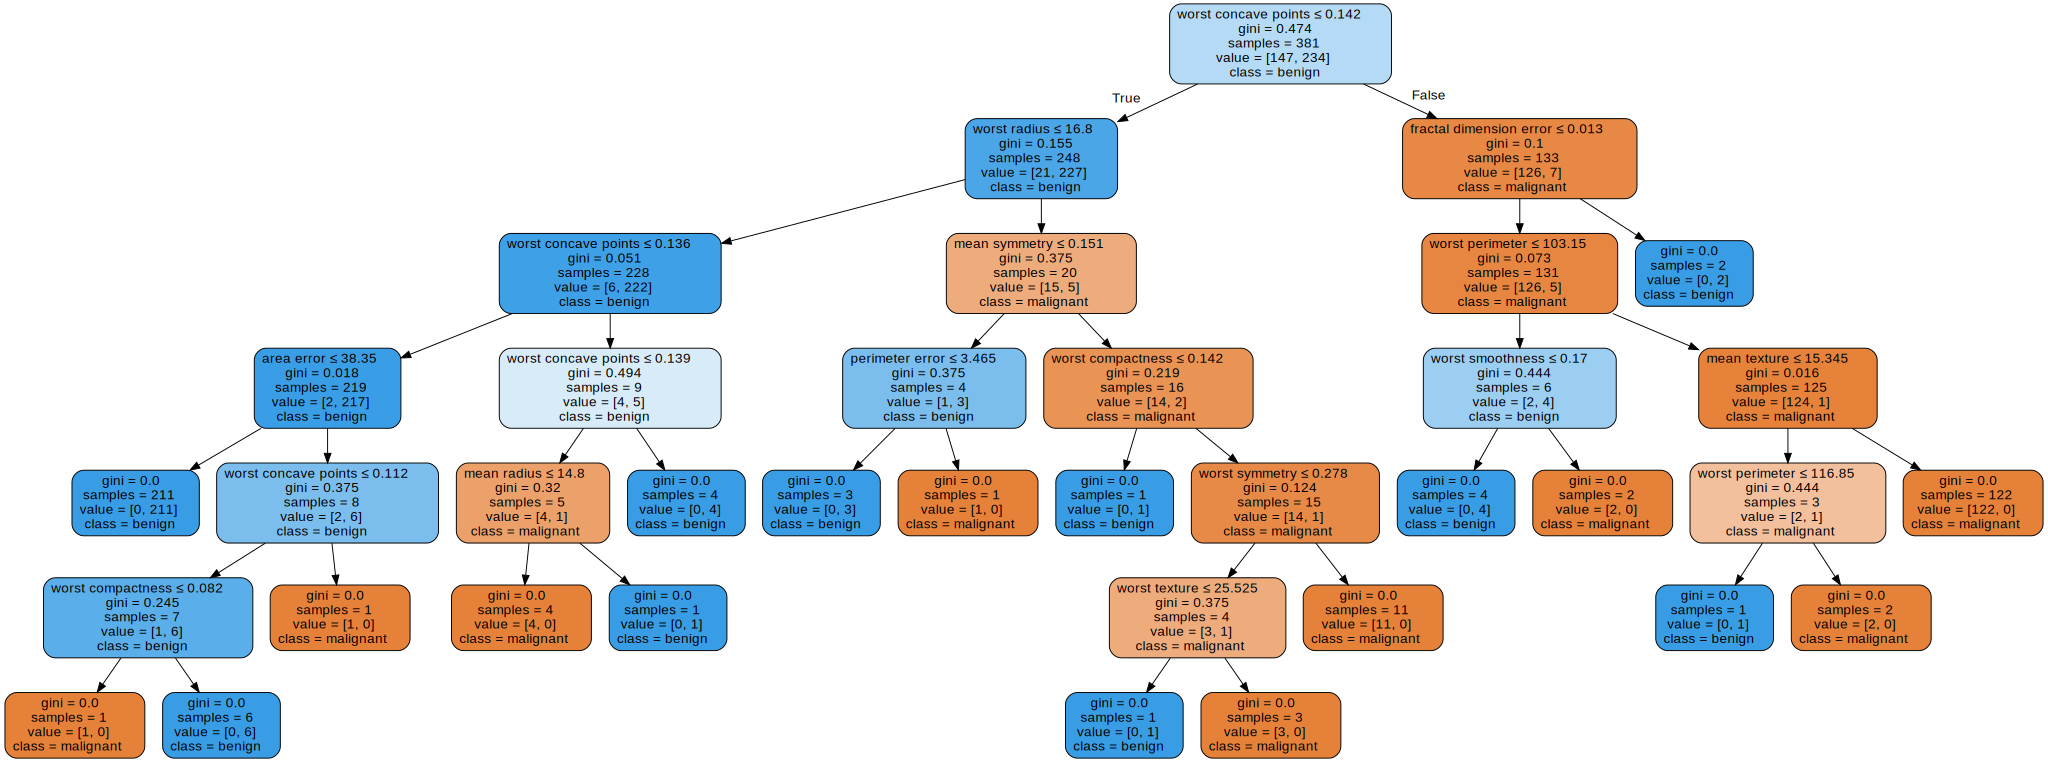

In [0]:
### Your solution
#raise NotImplementedError

dot_data = tree.export_graphviz(clf_grid.best_estimator_, out_file=None, 
                         feature_names=breast.feature_names,  
                         class_names=breast.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

**Krok 6:** Czas na zabawę! Spróbuj dopasować inne parametry i poprawić powyższy wynik.

**Step 6:** Time to have fun! Try adjusting other parameters and improving the above result.